In [3709]:
# Importando as bibliotecas necessárias;
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3433]:
warnings.filterwarnings("ignore")

In [3434]:
# Carregando os dados;
maindf = pd.read_csv("../data/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')
maindf.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Gender** : Gênero.

*   **Income** : Salário Mensal.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


## **Etapa de tratamento de dados**

### *Tratamento de tipo de dados*

Nesta etapa do projeto vamos verificar o tipo de dados de cada variável individualmente e iremos realizar a conversão do tipo de dados quando necessário.

In [3439]:
#Verificando os tipos dos dados;
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


Observando as informações podemos notar algumas divergências em relação ao que se espera do tipo de dados das variáveis. 

Espera-se que a variável **"Age"** possua um tipo de da dos Inteiro (int), porém, podemos observar que a mesma possui o tipo float. Além disso, podemos também notar a presença de valores nulos nessa variável

Além disso, podemos também notar que a variável **"Income"**, que espera-se ser de um tipo numérico (float), possui o tipo de dados object (nesse caso, str).

#### *Variável Age*

Para essa variável vamos precisar primeiramente realizar um tratamento em relação aos valores nulos presentes, a fim de que possamos realizar a conversão direta do tipo dos dados. Para isso, iremos preencher os campos nulos com o valor **"0"**.

In [3443]:
# Substituindo valores nulos por 0;
maindf["Age"].fillna(0, inplace=True)

# Convertendo o tipo de dados da variável;
maindf["Age"] = maindf["Age"].astype(int)

#### *Variável Income*

Observando a variável Income, podemos notar um pequeno erro de formato dos dados, notamos a presença de um caractere "," como elemento separador de casas decimais, e como sabemos, esse caractere não é reconhecido como sendo do tipo numérico, o que não nos permite realizar a conversão do tipo dos dados.

Vamos então primeiramente realizar o tratamento do formato dos dados nessa variável, removendo o caractere indesejado.

In [3446]:
# Removendo os caracteres "," e reformatando os valores;
maindf["Income"] = maindf["Income"].str.replace(".", "")
maindf["Income"] = maindf["Income"].str.replace(",", ".")

Após realizarmos o tratamento do formato dos dados, vamos então realizar a conversão para o tipo esperado (float).

In [3448]:
# Convertendo o tipo de dados;
maindf["Income"] = maindf["Income"].astype(float)

### *Tratamento de valores nulos*

Iremos agora realizar a etapa de tratamento de valores nulos, essa etapa é muito importante para evitar futuros erros em nossas análises estatísticas, bem como no projeto como um todo. Para começar, vamos realizar a contagem da porncetagem de valores nulos presentes em nosso dataframe variável a variável.

In [3451]:
# Calculando a porcentagem de valores nulos;
(maindf.isnull().sum() / len(maindf)) * 100

Age                   0.0
Gender                0.0
Income                0.0
Education             0.0
Marital Status        0.0
Number of Children    0.0
Home Ownership        0.0
Credit Score          0.0
dtype: float64

#### *Variável Age*

Observando os resultados notamos que os nossos calculos não acusaram nenhum valor nulo presente, porém, na etapa anterior do projeto nós realizamos a substituição dos valores nulos presentes na variável **"Age"** por **"0"**, para que pudessemos realizar a conversão do tipo de dados, mas, nessa etapa atual teremos que realizar o tratamento real desses valores, a fim de não comprometer a integridade dos dados.

Vamos agora então realizar uma verificação da porcentagem de valores nulos apenas para a variável **"Age"** individualmente.

In [3454]:
null_age = ((maindf["Age"] == 0).sum() / len(maindf)) * 100
print(f'Porcentagem de valores nulos da variável Age: {null_age:.2f} %')

Porcentagem de valores nulos da variável Age: 20.73 %


**Definição do método de tratamento**

Podemos ver que cerca de 21% dos dados da coluna **"Age"** são nulos, o que representa uma proncentagem considerável do total dos dados, temos então algumas opções de tratamentos que podem ser realizados.

* Realizar a remoção de todos os registros que possuem valores nulos na coluna **"Age"**.

  Essa não é uma abordagem promissora pois como vimos logo a cima, cerca de 21% dos dados da variável **"Age"** são nulos e se removermos todos esses 21% dos dados, teríamos uma perda significativa de dados na nossa base, o que certamente iria reduzir a eficácia e precisão do nosso futuro modelo preditivo.

* Remover a coluna **"Age"** da nossa base de dados.

    Pode ser uma abordagem interessante, porém, precisamos realizar a verificação da correlação entre todas as variáveis a fim de entender qual o impacto da remoção da variável **"Age"** em um cenário geral, mas inicialmente não iremos optar por não realizar esse processo agora, o que nos leva a terceira abordagem.

* Substituir os valores nulos por um valor estatístico como **Média** ou **Mediana** por exemplo.

  É a abordagem que iremos optar inicialmente, pois devido ao fato de que ainda não temos a informação concreta a respeito da relevância da variável no contexto da análise, iremos optar por mante-la, e verificar a sua relevância num momento futuro.

Para decidir qual medida estatística utilizar na substituição dos valores nulos, vamos ter que verificar a distribuição dos dados da variável, e também verificar a presença de outliers na mesma.

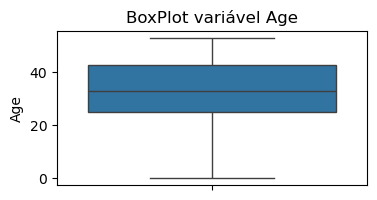

In [3460]:
# Verificando a presença de outliers na variável Age;
fig = plt.figure(figsize=(4, 2))
sns.boxplot(y=maindf["Age"])
plt.title("BoxPlot variável Age")
plt.show()

Observando o gráfico boxplot, podemos notar que não existem outliers na variável **"Age"**. Vamos então agora verificar a distribuição dos seus dados.

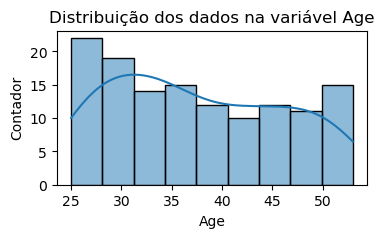

In [3462]:
# Verificando a distribuição dos dados na variável Age;
fig = plt.figure(figsize=(4, 2))
base = maindf["Age"][maindf["Age"] > 0]
sns.histplot(x=base, kde=True)
plt.title("Distribuição dos dados na variável Age")
plt.ylabel("Contador")
plt.show()

Observando o gráfico histograma podemos perceber que estamos lidando com dados que **não seguem uma "distribuição normal"**.

Analisando os dois gráficos que criamos, descobrimos que: *"A variável Age não possui outliers"* e *"A variável Age não possui uma distribuição de dados normal"*.

Considerando essas informações podemos tomar a decisão de utilizar a **Mediana** como valor substituto para os dados faltantes nessa variável, pois o valor da **Média** não seria um bom representante para o restante dos valores da variável, por não se tratar do valor real central dos dados.

**Tratando so valores nulos na variável Age**

In [3466]:
# Substituindo os valores nulos da variável Age pela Mediana;
media_age = maindf["Age"][maindf["Age"] > 0].median()
maindf["Age"].replace(0, media_age, inplace=True)

In [3467]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int32  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 9.7+ KB


### *Tratamento de outliers*

Nessa etapa do processo iremos buscar por valores outliers. É importante tratarmos valores outliers para evitar futuros problemas em nossas análises, pois, outliers são capazes de distorcer a nossa visão em relação as estatísticas reais da nossa base, o que ocasiona imprecisões em nossos modelos. Vamos então primeiramente realizar uma busca por valores outliers em nossa base, para entendermos se será necessário realizar tratamentos nesse sentido.

Vamos buscar por valores outliers utilizando o calculo do IQR (Intervalor interquartil).

In [3470]:
numerical_df = maindf.select_dtypes(include=["int", "float"])

def conta_outliers(dataframe):
    outliers = {}
    for colum in dataframe.columns:
        
        # Calculando o IQR;
        Q1 = dataframe[colum].quantile(0.25)
        Q3 = dataframe[colum].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definindo os limites superior e inferior;
        top_limit = Q3 + 1.5 * IQR
        bottom_limit = Q1 - 1.5 * IQR
    
        # Buscando por valores outliers;
        outliers[f"{colum}"] = (dataframe[colum] > top_limit) | (dataframe[colum] < bottom_limit)

    # Exibindo a quantidade de outliers por variável;
    print("Contagem de outliers em variáveis numéricas:\n")
    for chave, valor in outliers.items():
        print(f"Variável {chave}")
        print(f"Quantidade de outliers:\n{valor.sum()}\n")

conta_outliers(numerical_df)

Contagem de outliers em variáveis numéricas:

Variável Age
Quantidade de outliers:
0

Variável Income
Quantidade de outliers:
0

Variável Number of Children
Quantidade de outliers:
5



Observando nossa contagem de valores outliers, podemos perceber que aparentemente apenas a variável **"Number of Children"** possui valores outliers. Para validar essa informação, vamos então verificar quais são esses registros indicados como outliers, para decidirmos se de fato, são outliers.

In [3472]:
# Selecionando apenas as variáveis numéricas;
numerical_df = maindf.select_dtypes(include=["int", "float"])

# Calculando o IQR;
Q1 = numerical_df["Number of Children"].quantile(0.25)
Q3 = numerical_df["Number of Children"].quantile(0.75)
IQR = Q3 - Q1
        
# Definindo os limites supeior e inferior;
top_limit = Q3 + 1.5 * IQR
bottom_limit = Q1 - 1.5 * IQR

# Encontrando os valores outliers;
out_filter = (maindf["Number of Children"] > top_limit) | (maindf["Number of Children"] < bottom_limit)
outliers = maindf[out_filter]
outliers

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
33,45,Female,105000.0,Bachelor's Degree,Married,3,Owned,High
65,45,Female,110000.0,Bachelor's Degree,Married,3,Owned,High
97,45,Female,115000.0,Bachelor's Degree,Married,3,Owned,High
139,45,Female,105000.0,Bachelor's Degree,Married,3,Owned,High


Analisando os registros que foram indicados como contendo outliers na variável **"Number of Children"** no processo de busca anterior, podemos notar que na verdade os valores indicados não são outliers, pois três filhos, é uma quantidade razoável para uma família, sendo assim, iremos dar sequência a nossa análise.

### *Tratando a formatação de dados*

Nesta etapa do projeto, iremos realizar a verificação e tratamento da formatação dos dados. Vamos buscar por possíveis erros de digitação, caracteres indesejados etc.

Para iniciar o processo, vamos primeiramente buscar todos os valores únicos de cada uma das variáveis categóricas do dataframe, a fim de entender possíveis desvios em relação a formatação esperada.

In [3476]:
print("Valores únicos das variáveis categóricas: \n")

# Selecionando apenas as variáveis categóricas;
categorical_df = maindf.select_dtypes(include="object")

# Buscando apenas os valores únicos;
unicos = categorical_df.apply(lambda x: x.unique())

# Exibindo os valores únicos de cada uma das variáveis;
for chave, valor in unicos.items():
    print(f"Variável {chave}:\n Valores únicos: {valor}\n")

Valores únicos das variáveis categóricas: 

Variável Gender:
 Valores únicos: ['Female' 'Male']

Variável Education:
 Valores únicos: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Variável Marital Status:
 Valores únicos: ['Single' 'Married']

Variável Home Ownership:
 Valores únicos: ['Rented' 'Owned']

Variável Credit Score:
 Valores únicos: ['High' 'Average' 'Low']



Observando a lista de valores únicos nas variáveis categóricas, podemos perceber que não existem erros de digitação aparentes, a formatação também parece estar padrão, não se mostrando necessários tratamentos nesse sentido.

## **Etapa de análise dos dados**

Iremos agora começar a etapa de análise dos dados. Precisamos entender profundamente temas como a distribuição dos dados e correlacionar variáveis para encontrar padrões ocultos e alcançar insights relevantes.

### *Análise Univariada*

Nesta etapa, iremos analisar as variáveis de modo individual a fim de entender sua distribuição e também entender melhor o que cada uma representa no contexto geral da análise. Em um cenário normal, iríamos verificar algumas informações antes de escolher quais variáveis realizar a análise univariada, como por exemplo a correlação entre cada variável individual e a variável alvo ( nesse caso, a variável **Credit Score** ) porém, por se tratar de um conjunto de dados com poucas variáveis, é viável fazermos a análise univariada de todas as colunas do dataframe.

#### *Variável Age*

**Estatísticas básicas da variável**

Vamos iniciar a nossa análise verificando as informações estatísticas básicas da variável.

In [3485]:
maindf["Age"].describe()

count    164.000000
mean      37.195122
std        7.586619
min       25.000000
25%       31.750000
50%       36.000000
75%       43.000000
max       53.000000
Name: Age, dtype: float64

Observando as estatíscas básicas podemos notar que o nosso valor da média e da mediana estão razoávelmente próximos o que **talvez** possa indicar uma distribuição de dados de tipo normal, podemos também notar que os dados estão muito bem distribuidos entre os quartis, tendo uma transição suave entre os valores de cada um.

**Distribuição da variável**

Vamos verificar a distribuição dos dados na variável a fim de entender com qual tipo de distribuição estamos lidando, para isso, utilizaremos um gráfico histograma.

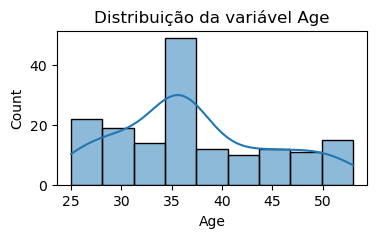

In [3489]:
fig = plt.figure(figsize = (4, 2))
sns.histplot(x = maindf["Age"], kde=True)
plt.title("Distribuição da variável Age")
plt.show()

*Observando o gráfico de distribuição podemos notar que temos um maior acúmulo de registros na faixa dos 25 a 35 anos, e logo após isso, o número de registros vai decaindo de forma lenta, tendo um pequeno pico novamente na faixa dos 55 anos, isso nos indica que em termos gerais, a maior parte dos nossos clientes estão em uma faixa entre os 25 e 40 anos.*

(obs: o pico que podemos observar na faixa dos 35 se deve ao tratamento de valores nulos que realizamos anteriormente).

**Faixas etárias mais povoadas**

Vamos agora verificar quais são as faixas etárias que possuem a maior quantidade de registros, para isso, vamos separar a variável em "bins". Mas antes, vamos carregar novamente os dados em um novo dataframe. Nesse novo dataframe, vamos optar pela remoção dos valores nulos presentes na variável "Age", para evitar enviesamentos na análise que iremos realizar agora.

In [3493]:
# Carregando os dados em um dataframe temporário;
dummie_df = pd.read_csv("../data/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

# Removendo os registros com valores nulos;
dummie_df.dropna(inplace=True)

Podemos então agora realizar a separação da variável em bins, conforme dito anteriormente.

In [3495]:
faixas_etarias = pd.DataFrame()

# Definindo os bins;
bins = [25, 35, 45, 55]

# Definindo as labels;
labels = ["25-35", "36-45", "46-55"]

# Dividindo os dados em faixas;
faixas_etarias["faixa etaria"] = pd.cut(dummie_df["Age"], bins=bins, labels=labels, right=False)
faixa_count = faixas_etarias["faixa etaria"].value_counts()

# Exibindo o gráfico de distribuição;
fig=px.pie(names=labels, values=faixa_count)
fig.update_layout(legend_title="Faixas Etárias")
fig.show()

Observando a distribuição de clientes por faixas etárias podemos notar que os dados estão distribuidos de forma decrescente, tendo a maior quantidade de observações na faixa dos 25 a 35 anos, o segundo maior número de observações na faixa dos 36 aos 45 anos, e por ultimo, a faixa dos 46 aos 56 anos.

*Nossa base de clientes é uma base razoávelmente jovem, pois cerca de 42% dos nossos clientes possuem idades entre os 25 e 35 anos.*

#### *Variável Gender*

**Balanciamento da variável**

Pelo fato da variável "Gender" ser uma variável categórica, iremos primeiramente verificar o balanciamento da variável a fim de entender a distribuição dos clientes entre Homens e Mulheres.

In [3500]:
# Contando os valores em cada gênero;
count_gender = maindf["Gender"].value_counts()

# Plotando um gráfico de barras;
fig = px.bar(count_gender, x=count_gender.index, y=count_gender.values, title="Balanciamento da variável Gender")
fig.show()

Observando o gráfico de barras a cima, podemos perceber que a variável "Gender" está muito bem balanciada, tendo apenas uma leve desproporção, com a categoria Female tendo apenas oito observações a mais que a categoria Male.

*Em outras palavras, nossa base de cliente está muito bem distribuida, não tendo um Gênero de clientes em maior evidência.*

#### *Variável Income*

**Estatísticas básicas da variável**

Para iniciarmos a etapa de análise dessa variável vamos primeiramente realizar a verificação das informações estatísticas basicas a fim de termos uma visão geral dos dados.

In [3505]:
# Exibindo as informações estatísticas basicas dos dados
maindf["Income"].describe()

count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64

Verificando as informações acima, podemos notar algumas coisas interessantes. 

* Podemos ver que os valores da média e da mediana são muito próximos, o que nos indica que possivelmente não existem outliers nessa variável (informação já validada anteriormente na etapa de tratamento de outliers), e também *pode indicar** um tipo de distribuição de dados normal.


* Podemos também perceber que existe uma grande discrepância entre os salários mais baixos e mais altos.
  

* Notamos também que, apesar da grande discrepância entre os valores mínimos e máximos, os dados estão razoavelmente bem escalonados, não havendo nenhum salto muito grotesco entre os valores dos quartis.

**Distribuição da variável**

Vamos verificar a distribuição dos dados na variável a fim de entender com qual tipo de distribuição estamos lidando, para isso, utilizaremos um gráfico histograma.

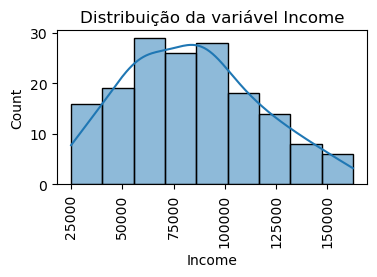

In [3509]:
fig = plt.figure(figsize=(4, 2))
sns.histplot(x=maindf["Income"], kde=True)
plt.title("Distribuição da variável Income")
plt.xticks(rotation=90)
plt.show()

*Observando o gráfico histograma podemos ver que de fato, a variável possui uma distribuição que lembra muito uma distribuição normal, tendo apenas uma leve assimetria a direita.*

**Faixas salariais mais povoadas**


Nessa etapa iremos repetir um processo parecido com o que fizemos durante a análise da variável "Age". Vamos verificar quais são as faixas saláriais mais povoadas dos dados.

In [3512]:
# Definindo os "Bins";
bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000]

# Definindo as "Labels";
labels = ["25000-50000", "51000-75000", "76000-100000", "101000-125000", "126000-150000", "151000-175000"]

# Dividindo os dados a partir dos bins;
faixas_salariais = pd.cut(maindf["Income"], bins=bins, labels=labels, right=False)

# Contando as quantidades presentes em cada bin;
count_faixas_salariais = faixas_salariais.value_counts(normalize=True) * 100
count_faixas_salariais = count_faixas_salariais.reindex(labels)

# Exibindo a distribuição em um gráfico;
fig = px.bar(count_faixas_salariais, x=count_faixas_salariais.index, y=count_faixas_salariais.values, title="Faixas salariais mais povoadas", category_orders={"x": labels})
fig.update_traces(text=[f"{val:.2f}%" for val in count_faixas_salariais.values], textposition="inside")
fig.update_layout(xaxis_title="Salário")
fig.update_layout(yaxis_title="Observações")
fig.show()


Observando o gráfico a cima temos algumas informações interessantes.

* *A grande maioria dos clientes (aproximadamente 54%) possuem uma faixa salarial mensal que gira em torno dos 51.000 e 100.000 reais.*

* *Apenas 3.66% dos clientes tem um salário a cima dos 150.000 reais.*

* *Dentre nossa base, temos mais clientes recebendo entre 101.000 e 125.000 reais (17%), que clientes recebendo na faixa dos 25.000 aos 50.000 reais (14,63%).*

#### *Variável Education*

**Balanciamento da variável**

Iremos primeiramente verificar o balanciamento da variável a fim de entender como a base está dividida sob a ótica do nível de escolariade. Para isso, primeiramente vamos realizar uma contagem dos valores únicos presentes na variável, logo após isso, exibir as informações em um gráfico de barras.

In [3517]:
# Separando os clientes por nível de educação;
count_education = (maindf["Education"].value_counts(normalize=True)*100).reset_index()
count_education.columns = ["Education", "education%"]

# Exibindo as informações em um gráfico;
fig = px.bar(count_education, x=count_education["Education"], y=count_education["education%"], title = "Clientes por nível de educação")
fig.update_traces(text = [f"{val:.2f}%" for val in count_education["education%"]])
fig.update_layout(xaxis_title="Nível de educação")
fig.update_layout(yaxis_title="Observações")
fig.show()

Observando as informações no gráfico podemos notar algumas informações interessantes.

* Estamos lidando com uma variável **desbalanceada**.

* A grande maioria (aproximadamente 67%) dos nossos clientes possuem nível superior.

* Todos nossos clientes tem um nível de escolaridade a cima do ensino médio.

#### *Variável Marital Status*

**Balanciamento da variável**

Nesta variável estamos novamente lidando com dados categóricos, e assim como nas etapas anteriores, vamos iniciar verificando o balandiamento da variável separando os dados pelas categorias e exibindo as informações por meio de um gráfico.

In [3521]:
count_marit_status = (maindf["Marital Status"].value_counts(normalize=True)*100).reset_index()
count_marit_status.columns = ["Marital_Status", "Marital_Status%"]

fig = px.bar(count_marit_status, x=count_marit_status["Marital_Status"], y=count_marit_status["Marital_Status%"], title="Clientes por Estado Civil")
fig.update_traces(text= [f"{val:.2f}%" for val in count_marit_status["Marital_Status%"]], textposition="inside")
fig.update_layout(xaxis_title="Estado Civil")
fig.update_layout(yaxis_title="Observações")
fig.show()

*Observando o gráfico podemos notar que existem mais clientes casados que solteiros em nossa base, apesar de ser uma desproporção muito leve.*

#### *Variável Number of Children*

**Balanciamento da variável**

Para iniciarmos essa etapa vamos novamente verificar o balanciamento da variável.

In [3525]:
# Separando os clientes por categorias;
count_children = (maindf["Number of Children"].value_counts(normalize=True)*100).reset_index()
count_children.columns = ["number_children", "number_children%"]

# Exibindo as informações em um gráfico;
fig = px.bar(count_children, x=count_children["number_children"], y=count_children["number_children%"], title="Clientes por número de filhos")
fig.update_traces(text=[f'{val:.2f}%' for val in count_children["number_children%"]],textposition="inside")
fig.update_layout(xaxis_title="Número de filhos")
fig.update_layout(yaxis_title="Observações")
fig

Observando o gráfico podemos observar algumas informações interessantes.

* Estamos lidando com um variável **desbalanceada**.

* A grande maioria (aproximadamente 59%) dos nossos clientes não tem filhos.

* Apenas 3% dos clientes possuem mais de 2 filhos.

#### *Variável Home Ownership*

**Balanciamento da variável**

Nesta variável estamos novamente lidando com dados categóricos, e assim como nas etapas anteriores, vamos iniciar verificando o balandiamento da variável separando os dados pelas categorias e exibindo as informações por meio de um gráfico.

In [3529]:
# Separando os clientes em categorias;
owner_count = (maindf["Home Ownership"].value_counts(normalize=True)*100).reset_index()
owner_count.columns = ["ownership", "ownership%"]

# Exibindo as informações em gráficos;
fig = px.bar(owner_count, x=owner_count["ownership"], y=owner_count["ownership%"], title="Clientes por Home Ownership (possuidores de imóvel)")
fig.update_traces(text=[f"{val:.2f}%" for val in owner_count["ownership%"]], textposition="inside")
fig.update_layout(xaxis_title="Possui imóvel")
fig.update_layout(yaxis_title="Observações")
fig.show()

Observando o gráfico podemos observar algumas informações interessantes.

* Estamos lidando com um variável **desbalanceada**.

* A grande maioria (67,68%) dos nossos clientes possuem imóvel próprio.

#### *Variável Credit Score*

**Balanciamento da variável**

Nesta variável estamos novamente lidando com dados categóricos, e assim como na etapas anterior, vamos então novamente iniciar verificando o balandiamento da variável separando os dados pelas categorias e exibindo as informações por meio de um gráfico.

In [3533]:
# Dividindo os dados em categorias;
cscore_count = (maindf["Credit Score"].value_counts(normalize=True)*100).reset_index()
cscore_count.columns = ["Credit_Score", "Credit_Score%"]

# Exibindo as informações em um gráfico;
fig = px.bar(cscore_count, x=cscore_count["Credit_Score"], y=cscore_count["Credit_Score%"], title="Clientes por Credit Score")
fig.update_traces(text=[f"{val:.2f}%" for val in cscore_count["Credit_Score%"]], textposition="inside")
fig.update_layout(xaxis_title="Pontuação de crédito")
fig.update_layout(yaxis_title="Observações")
fig.show()

Observando o gráfico podemos observar algumas informações interessantes.

* Estamos lidando com um variável desbalanceada.

* A grande maioria dos clientes (68,9%) possui um Credit Score alto.

*Observação: a variável Credit Score é a nossa variável alvo (ou a variável a ser predita), sendo assim, **será imprescindível realizar um processo de balanciamento nessa variável futuramente**, para que possamos treinar o algorítmo de forma adequada.*

---

### *Análise Bivariada*

Estamos agora entrando na etapa de análise Bivariada, nessa etapa iremos realizar análises utilizando multiplas variáveis a fim de responder perguntas chaves de negócio. O primeiro passo para iniciarmos, é definirmos as perguntas a serem respondidas, para assim, ter um objetivo claro a ser cumprido.



**Perguntas de negócio**

* Existe relação entre a **Idade** e o **Status Civil**?
  
* Qual a relação entre o **Score de Crédito** e o **Nível de Escolaridade**?
  
* O **Salário** parece influenciar na **Idade**?
  
* O **Salário** parece influenciar no **Score de Crédito**?
  
* Clientes com **Casa Própria** tendem a ter um **Score** mais alto?

* O **Gênero** tem influência no **Salário**?

* O **Salário** tem relação com o **Nível de Escolaridade?**

* O **Score de Crédito** tem relação com a **Idade**?


Antes de inciarmos as análises teremos que converter todas as variáveis categóricas de texto (str) para numérico, para que assim, possamos fazer calculos estatísticos que serão necessários durante o processo. Para isso, vamos utilizar o método "LabelEncoder" por ser um método mais simples, e que não envolve a criação de várias outras colunas no DataFrame (obs: nesse caso, não precisaremos ter tanto cuidado em relaçao ao ao método de conversão que utilizaremos, pois, vamos trabalhar com um DataFrame secundário que servirá apenas como base para alcançamos as respostas que buscamos nessa etapa. O DataFrame que será o produto final do projeto não será este que utilizaremos nessa etapa).

**Criando o dataframe Dummie**

In [3541]:
# Stanciando o Label Encoder;
label_encoder = LabelEncoder()

# Criando o dataframe "dummie";
dummie_df = maindf.copy()

# Convertendo as variáveis de texto para numérico;
for colum in dummie_df.select_dtypes(include="object"):
    dummie_df[f'{colum}_encoded'] = label_encoder.fit_transform(dummie_df[colum])

#### Respondendo as perguntas

##### **Pergunta 1: Existe relação entre a Idade e o Status Civil?**

Para responder essa questão teremos de trabalhar inicialmente com as variáveis "Age" e "Marital Status". Primeiramente vamo calcular a correlação entre as variáveis para ter uma visão inicial a respeito da relação entre as duas.

In [3545]:
# Calculando a correlação;
corr = dummie_df[["Age", "Marital Status_encoded"]].corr()
corr

,Age,Marital Status_encoded
Age,1.000000,-0.449115
Marital Status_encoded,-0.449115,1.000000


Observando o calculo de correlação podemos notar que as duas variáveis possuem um valor de correlação negativa significativo.

Vamos então utilizar outra abordagem para termos uma visão mais específica dessa observação. Vamos agrupar os clientes por faixas etárias, e depois, verificar as quantidades de observações entre "Casados" e "Solteiros" em cada faixa.

In [3547]:

# Definindo os "bins" e "labels"
bins = [25, 30, 35, 40, 45, 50, 55]
labels = ["25-30", "31-35", "36-40", "41-45", "46-50", "51-55"]

# Dividindo os dados em faixas etárias
dummie_df["faixas_etarias"] = pd.cut(dummie_df["Age"], bins=bins, labels=labels, right=False)

# Calculando o total de observações por faixa etária
total_por_faixa = dummie_df["faixas_etarias"].value_counts().sort_index().rename("total").reset_index()
total_por_faixa.rename(columns={"index": "faixas_etarias"}, inplace=True)

# Agrupando os dados pelas faixas etárias e calculando os "status civis"
StatusCivil_fxEtaria = (dummie_df.groupby("faixas_etarias")["Marital Status"].value_counts(normalize=True) * 100).reset_index(name="percentual")

# Mesclando as duas variáveis em uma única;
dados_grafico = StatusCivil_fxEtaria.merge(total_por_faixa, on=["faixas_etarias"])

# Criando o gráfico interativo com Plotly
fig = px.bar(
    StatusCivil_fxEtaria,
    x="faixas_etarias",
    y="percentual",
    color="Marital Status",
    barmode="group",  # Faz um gráfico de barras segmentadas
    text=StatusCivil_fxEtaria["percentual"].map(lambda x: f"{x:.0f}%")  # Adiciona valores com '%' nas barras
)

# Personalizando o gráfico
fig.update_layout(
    title="Distribuição de Estado Civil por Faixa Etária",
    xaxis_title="Faixas Etárias",
    yaxis_title="Percentual de Clientes (%)",
    yaxis=dict(range=[0, 110]),
    legend_title="Estado Civil",
    xaxis_tickangle=0  # Mantém os rótulos do eixo X legíveis
)

# Exibindo o gráfico
fig.show()

Existe relação entre a Idade e o Status Civil?

**Resposta:**

*Sim! Observando o gráfico de barras segmentado a cima podemos ver que de fato, existe uma relação entre a **Idade** dos clientes e o **Status Civil**. No geral, quanto maior a idade dos clientes, maior a propensão a serem casados, apesar de existir uma "anomalia" na faixa dos 41-45 anos.* 

---

##### **Pergunta 2: Qual a relação entre o Score de Crédito e o Nível de Escolaridade?**

Para responder essa pergunta iremos novamente iniciar verificando o valor da correlação entre as duas variáveis.

In [3551]:
# Calculando o valor da correlação entre as variáveis;
corr = dummie_df[["Credit Score_encoded", "Education_encoded"]].corr()
corr

,Credit Score_encoded,Education_encoded
Credit Score_encoded,1.000000,0.334424
Education_encoded,0.334424,1.000000


Observando o valor da correlação entre as variáveis podemos que existe uma leve correlação positiva entre ambas. Vamos então analisar mais profundamente para entender melhor o que esse valor representa.

In [3553]:

# Separando os dados;
percentage_credit = (dummie_df.groupby("Education")["Credit Score"].value_counts(normalize=True)*100).reset_index(name="percentual")

# Criando o gráfico com Plotly
fig = px.bar(
    percentage_credit,
    x="Education",
    y="percentual",
    color="Credit Score",
    barmode="group",
    text=percentage_credit["percentual"].map(lambda x: f"{x:.0f}%")
)

# Personalizando o gráfico
fig.update_layout(
    title="Distribuição de Credit Score por Nível de Educação",
    xaxis_title="Nível de Educação",
    yaxis_title="Percentual de Clientes (%)",
    yaxis=dict(range=[0, 110]),
    legend_title="Credit Score",
    xaxis_tickangle=-45
)

# Exibindo o gráfico
fig.show()

Qual a relação entre o Score de Crédito e o Nível de Escolaridade?

**Resposta:**

*Observando o gráfico, podemos notar que de fato, existe uma correlação positiva, onde quanto maior o nível acadêmico de um cliente, maior tende a ser o seu Credit Score.*

---

##### **Pergunta 3: O Salário parece influenciar na Idade?**

Para responder essa questão vamos novamente iniciar a análise a partir de um calculo de correlação entre as duas variáveis alvo.

In [3558]:
corr = maindf[["Income", "Age"]].corr()
corr

,Income,Age
Income,1.000000,0.621492
Age,0.621492,1.000000


Observando o valor da correlação entre as variáveis fica claro que existe uma correlação muito forte entre ambas, vamos então novamente utilizar alguns gráficos para nos aprofundarmos um pouco mais nesse tema.

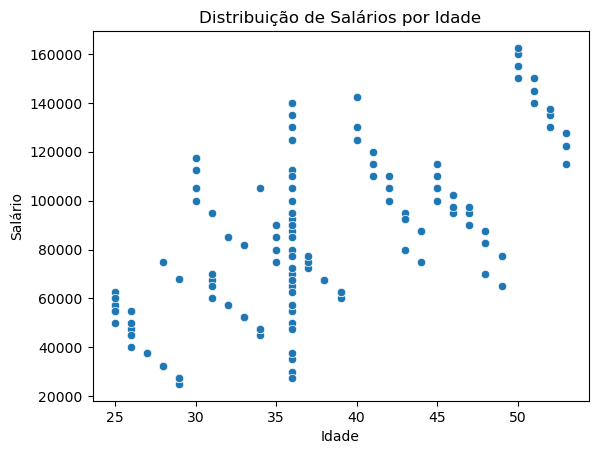

In [3560]:
# Criando um gráfico de scatterplot para verificar a relação entre as duas variáveis;
sns.scatterplot(data=maindf, x="Age", y="Income")
plt.title("Distribuição de Salários por Idade")
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.show()

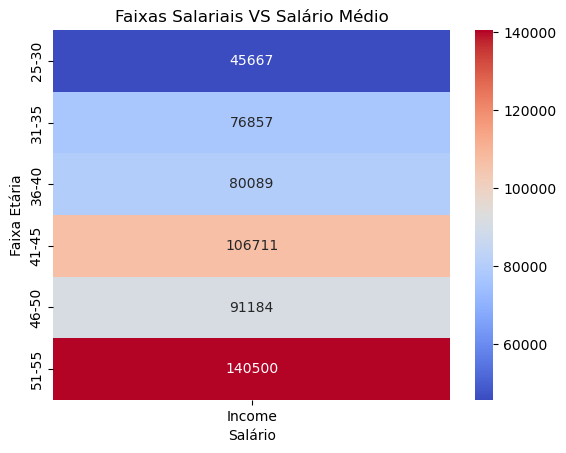

In [3561]:
# Criando um gráfico heatmap para verificar os valores salariais em cada faixa etária;
heatmap_data = dummie_df.pivot_table(index="faixas_etarias", values="Income")
sns.heatmap(data=heatmap_data, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Faixas Salariais VS Salário Médio")
plt.ylabel("Faixa Etária")
plt.xlabel("Salário")
plt.show()

O Salário parece influenciar na Idade?

**Resposta:**

*Sim! O salário **parece** influenciar na idade, porém, ao refletirmos a respeito das duas variáveis, podemos chegar a conclusão que na verdade, é a idade que influencia diretamente no salário, pois, com o passar dos anos, uma pessoa tende a alcançar salários maiores, e os dados corroboram com essa hipótese.*

---

##### **Pergunta 4: O Salário parece influenciar no Score de Crédito?**

Assim como em todas as etapas anteriores, vamos começar essa análise verificando o valor de correlação entre as duas variáveis.

In [3565]:
# Calculando a correlação entre "Income" e "Credit Score";
corr = dummie_df[["Income", "Credit Score_encoded"]].corr()
corr

,Income,Credit Score_encoded
Income,1.000000,0.083698
Credit Score_encoded,0.083698,1.000000


Os valores de correlação nos levão a imaginar que não existe uma relação explícita entre o salário e o score de crédito de um cliente, porém, para analisarmos melhor essa hipotese, vamos calcular a corelação de todo o dataframe.

In [3567]:
# Calculando a correlação de todo o dataframe;
corr = dummie_df.select_dtypes(include=["float", "int"]).corr()
corr

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital Status_encoded,Home Ownership_encoded,Credit Score_encoded
Age,1.000000,0.621492,0.072432,0.204661,0.171525,-0.449115,-0.628042,0.218494
Income,0.621492,1.000000,0.084547,0.495738,0.369449,-0.471004,-0.704928,0.083698
Number of Children,0.072432,0.084547,1.000000,-0.442139,0.047311,-0.696984,-0.497129,0.136517
Gender_encoded,0.204661,0.495738,-0.442139,1.000000,0.248671,0.278362,-0.031519,-0.247729
Education_encoded,0.171525,0.369449,0.047311,0.248671,1.000000,-0.067797,-0.397043,0.334424
Marital Status_encoded,-0.449115,-0.471004,-0.696984,0.278362,-0.067797,1.000000,0.708374,-0.205756
Home Ownership_encoded,-0.628042,-0.704928,-0.497129,-0.031519,-0.397043,0.708374,1.000000,-0.293384
Credit Score_encoded,0.218494,0.083698,0.136517,-0.247729,0.334424,-0.205756,-0.293384,1.000000


Observando a correlação geral entre as variáveis podemos notar que a variável Income possui uma correlação considerável com multiplas variáveis que por sua vez, possuem uma correlação interessante com a variável Credit Score, e isso talvez possa nos indicar uma correlação indireta entre ambas, porém, vamos dar sequência a análise seguindo o contexto da pergunta.

Vamos então separar nossos clientes por faixas salariais a fim de entender qual o score de crédito predominante em cada faixa, a partir de um gráfico de barras segmentado.

In [3570]:
# Definindo os "Bins";
bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000]

# Definindo as "Labels";
labels = ["25000-50000", "51000-75000", "76000-100000", "101000-125000", "126000-150000", "151000-175000"]

# Dividindo os dados a partir dos bins;
dummie_df["faixas_salariais"] = pd.cut(maindf["Income"], bins=bins, labels=labels, right=False)

# Separando os dados;
percentage_credit = (dummie_df.groupby("faixas_salariais")["Credit Score"].value_counts(normalize=True)*100).reset_index(name="percentual")

# Criando o gráfico com Plotly
fig = px.bar(
    percentage_credit,
    x="faixas_salariais",
    y="percentual",
    color="Credit Score",
    barmode="group",
    text=percentage_credit["percentual"].map(lambda x: f"{x:.0f}%")
)

# Personalizando o gráfico
fig.update_layout(
    title="Distribuição de Credit Score por Nível de Educação",
    xaxis_title="Nível de Educação",
    yaxis_title="Percentual de Clientes (%)",
    yaxis=dict(range=[0, 110]),
    legend_title="Credit Score",
    xaxis_tickangle=-45
)

# Exibindo o gráfico
fig.show()

Observando o gráfico de barras a cima podemos notar que sim! O salário tem uma influência no score de crédito dos clientes. Isso nos mostra que de fato, apesar de existir uma baixa correlação direta entre as variáveis Income e Credit Score, existe uma forte correlação indireta entre ambas.

O salário parece influenciar no Score de Crédito?

**Resposta:**

*Sim! Apesar de não existir uma correlação direta entre ambas as variáveis, o valor do salário influencia fortemente a variável Score de Credito.*

---

##### **Pergunta 5: Clientes com casa própria tendem a ter um score mais alto?**

Para responder essa pergunta vamos primeiramente agrupar os dados a partir da coluna "Home Ownership", e logo após isso, calcular a porcentagem das faixas de pontuação de crédito dentro de cada agrupamento, e então exibir as informações a partir de um gráfico de barras segmentado.

In [3575]:
# Agrupando os dados e calculando as porcentagens;
percentage_credit = (dummie_df.groupby("Home Ownership")["Credit Score"].value_counts(normalize=True) * 100).reset_index(name="percentual")

# Exibindo as informações em um gráfico;
fig = px.bar(percentage_credit,
            x="Home Ownership",
            y="percentual",
            color="Credit Score",
            barmode="group",
            text=percentage_credit["percentual"].map(lambda x: f"{x:.0f}%")
            )

fig.update_layout(title="Pontuação de crédito VS House Ownership (possuidor de imóvel)",
                 xaxis_title="Possui imóvel",
                 yaxis_title="Porcentagem de observações",
                 yaxis=dict(range=[0, 110]),
                 legend_title="Credit Score",
                 xaxis_tickangle=-45
                 )
fig.show()

Clientes com casa própria tendem a ter um score mais alto?

**Resposta:**

*Sim! Observando o gráfico podemos notar que dentre todos clientes que possui casa própria 98% possui um score de crédito considerado alto, e apenas 2% possui score de crédito médio, enquanto entre os clientes que não possui casa própria, apenas 8% possui um score de crédito alto, os outros 92% estão divididos em 64% score médio e 28% score baixo.*

---

##### **Pergunta 6: O **Gênero** tem influência no **Salário**?**

Nessa questão iremos novamente realizar o agrupamento da nossa base de dados, porém, dessa vez a partir da coluna faixas salariais, após isso, vamos separar esse agrupamento por gênero, para tentar encontrar a resposta para a questão.

In [3579]:
# Agrupando os dados e calculando as poercentagens;
percentage_gender = (dummie_df.groupby("faixas_salariais")["Gender"].value_counts(normalize=True)*100).reset_index(name="percentage_gender")

# Exibindo as informações em um gráfico;
fig = px.bar(percentage_gender,
            x="faixas_salariais",
            y="percentage_gender",
            color="Gender",
            barmode="group",
            text=percentage_gender["percentage_gender"].map(lambda x: f"{x:.0f}%")
            )

fig.update_layout(title="Salário VS Gênero",
                 xaxis_title="Faixa salarial",
                 yaxis_title="Porcentagem de observações",
                 yaxis=dict(range=[0, 110]),
                 legend_title="Credit Score",
                 xaxis_tickangle=-45
                 )
fig.show()

O Gênero tem influência no Salário?

**Resposta:**

*Sim! Ao observarmos o gráfico a cima fica claro que a presença feminia é muito forte dentre as faixa salariais mais baixas, enquanto a presença masculina é mais notada nas faixas salariais mais altas, tendo 100% dos clientes homens entre as duas faixas salariais mais elevadas (126000-150000 e 151000-175000).*

---

##### Pergunta 7: O **Salário** tem relação com o **Nível de Escolaridade??**

Para respondermos essa pergunta vamos inicialmente calcular a correlação entre ambas as variáveis para termos uma ideia inicial de possíveis correlações.

In [3583]:
# Calculando a correlação das variáveis;
corr = dummie_df[["Income", "Education_encoded"]].corr()
corr

,Income,Education_encoded
Income,1.000000,0.369449
Education_encoded,0.369449,1.000000


Observando o valor da correlação das variáveis vemos que existe uma certa correlação entre ambas, vamos então utilizar gráficos para confirmar o possível relacionamento entre ambas.

In [3585]:
# Agrupando os dados pelas faixas salariais, e calculando a porcentagem dos níveis de educação em cada grupo;
income_education = dummie_df.groupby("Education")["Income"].mean().reset_index(name="media_salarial")

income_education["Education"].replace(["High School Diploma", 
                                          "Associate's Degree",
                                          "Bachelor's Degree",
                                          "Master's Degree",
                                          "Doctorate"], ["Ensino médio",
                                                        "Tecnólogo",
                                                        "Bacharel",
                                                        "Mestrado",
                                                        "Doutorado"], inplace=True)

income_education = income_education.sort_values(by='media_salarial', ascending=True)

fig = px.bar(income_education,
            x="Education",
            y="media_salarial",
            color="media_salarial",
            text=income_education["media_salarial"].map(lambda x: f"R$ {x:.2f}")
            )
fig.update_layout(xaxis_title="Nível Acadêmico",
                 yaxis_title="Média Salarial")

fig.show()

Observando o gráfico podemos notar algumas informações interessantes, aparentemente o nível acadêmico não tem uma relação tão alta com o salário dos clientes, pois podemos ver uma certa desordenação em relação ao que era de se esperar entre o salário que cada clientes está recebendo e o seu nível acadêmico.

O Salário tem relação com o Nível de Escolaridade?

**Resposta:**

*Não! O salário dos clientes não parece ter uma relação muito forte com seu nível de escolaridade, pois como podemos ver no gráfico a cima, existe uma grande desordem em relação aos níveis acadêmicos dos clientes e os seus respectívos salários.*

---

##### Pergunta 8:  O **Score de Crédito** tem relação com a **Idade**?

Vamos começar responder essa pergunta primeiramente calculando o valor da correlação entre as duas variáveis.

In [3591]:
corr = dummie_df[["Credit Score_encoded", "Age"]].corr()
corr

,Credit Score_encoded,Age
Credit Score_encoded,1.000000,0.218494
Age,0.218494,1.000000


De primeiro momento, podemos ver que existe uma correlação razoávelmente baixa entre as variáveis, o que **talvez** possa indicar que não existe relação entre ambas, mas para responder essa pergunta, vamos novamente utilizar gráficos.

In [3593]:
porcentagem_credito = (dummie_df.groupby("faixas_etarias")["Credit Score"].value_counts(normalize=True) * 100).reset_index(name="porcentagem_credito")

fig = px.bar(porcentagem_credito,
            x="faixas_etarias",
            y="porcentagem_credito",
            color="Credit Score",
            barmode="group",
            text=porcentagem_credito["porcentagem_credito"].map(lambda x: f"{x:.0f}%"))

fig.update_layout(title="Credit Score VS Age",
                 xaxis_title="Faixas Etárias",
                 yaxis_title="Porcentagem de observações",
                 legend_title="Credit Score",
                 yaxis=dict(range=[0, 110]),
                 xaxis_tickangle=-45
                 )

fig.show()

O Score de Crédito tem relação com a Idade?

**Resposta:**

*Sim! Como podemos ver no gráfico acima, diferente do que pensamos incialmente durante a observação do valor da correlação, a idade tem uma relação direta com a pontuação de crédito dos clientes, pois quanto mais velho o cliente é, maior tende a ser a sua pontuação de crédito.*

Obs: Em relação a diferença que existe entre ao que pensamos durante a análise do calculo da correlação e as observações reais, possívelmente se deve a a multipla correlação que existe entre todas as variáveis, pois ao observarmos a matriz de correlação de todo o dataframe, podemos notar que a variável "Age" possui uma altíssima correlação com a variável "Home Ownership", que por sua vez, é a variável com maior correlação com a variável Credit Score entre todas as outras.

### *Correlação e Balanceamento de variáveis*

Estamos agora entrando nas ultimas etapas do nosso projeto, nessa etapa nós vamos primeiramente analisar a correlação das variáveis, vamos também realizar o balanceamento de variáveis relevantes e por ultimo, vamos separar nossos dados em base de treino e teste, deixando-os prontos para para trabalharmos no nosso futuro modelo.

#### *Correlação de variáveis*

Para realizar essa etapa, precisamos primeiramente converter as variáveis categóricas em variáveis numéricas, pois somente assim, poderemos calcular a correlação de todas as variáveis do dataframe, porém vamos nesse momento utilizar o dataframe dummie que criamos a etapa passada, e posteriormente iremos codificar as variaáveis categóricas do dataframe principal.

In [3599]:
corr = dummie_df.select_dtypes(include=["int", "float"]).corr()
corr

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital Status_encoded,Home Ownership_encoded,Credit Score_encoded
Age,1.000000,0.621492,0.072432,0.204661,0.171525,-0.449115,-0.628042,0.218494
Income,0.621492,1.000000,0.084547,0.495738,0.369449,-0.471004,-0.704928,0.083698
Number of Children,0.072432,0.084547,1.000000,-0.442139,0.047311,-0.696984,-0.497129,0.136517
Gender_encoded,0.204661,0.495738,-0.442139,1.000000,0.248671,0.278362,-0.031519,-0.247729
Education_encoded,0.171525,0.369449,0.047311,0.248671,1.000000,-0.067797,-0.397043,0.334424
Marital Status_encoded,-0.449115,-0.471004,-0.696984,0.278362,-0.067797,1.000000,0.708374,-0.205756
Home Ownership_encoded,-0.628042,-0.704928,-0.497129,-0.031519,-0.397043,0.708374,1.000000,-0.293384
Credit Score_encoded,0.218494,0.083698,0.136517,-0.247729,0.334424,-0.205756,-0.293384,1.000000


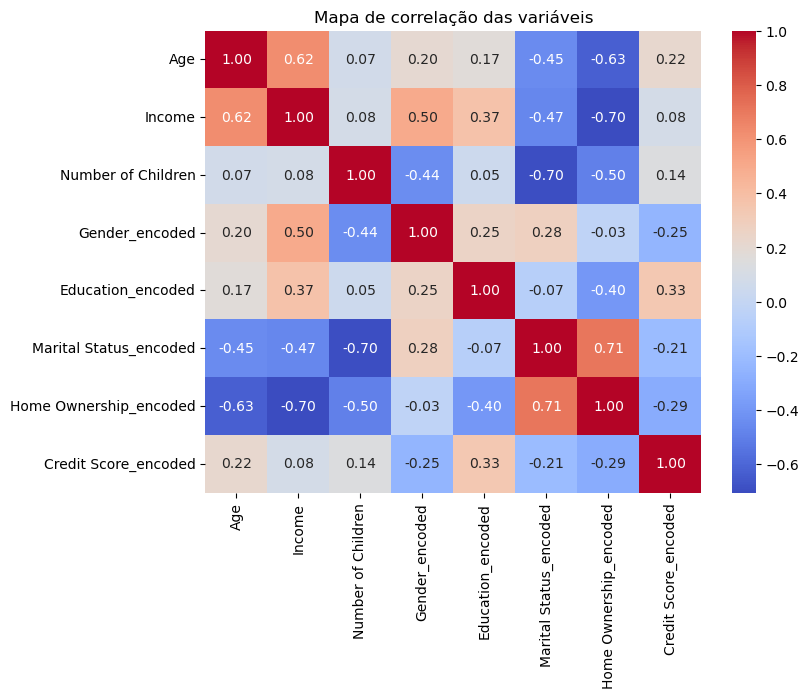

In [3600]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlação das variáveis")
plt.show()

Observando o gráfico de calor da matriz de correlação, podemos notar alguns valores de correlação interessantes, e considerando significado de cada variável, percebemos que de fato, todas a variáveis que possuem uma alta/media correlação, fazem sentido dado o contexto de cada uma.

#### *Codificação de atributos categóricos*

nessa etapa, iremos realizar a codificação das variáveis categóricas do dataframe principal, essa etapa é muito importante, pois somente assim, essas variáveis poderão ser utilizadas em nosso modelo futuro.

É impressindível que utilizemos o método de codificação adequado (Label encoder ou OneHot Encoder) para evitar enviesamentos, atribuindo "pesos diferentes" para atributos que em teoria não deveriam ter.

In [3604]:
# Exibindo apenas as variáveis categóricas;
cat_variable = maindf.select_dtypes(include=["object"])
for x in cat_variable.columns:
    print(f"Variável - {x}")

Variável - Gender
Variável - Education
Variável - Marital Status
Variável - Home Ownership
Variável - Credit Score


**OneHot Encoder**

Primeiramente vamos selecionar as variáveis não odinais, ou seja, variáveis que não possui ordem de grandeza entre seus atributos, pois essas variáveis serão codificadas a partir da técnica do OneHot Encoder.

As variáveis serão:

Gender, Marital Status e Home Ownership.

In [3606]:
oneHot_col = ["Gender", "Marital Status", "Home Ownership"]
maindf = pd.get_dummies(maindf, columns=oneHot_col, drop_first=True)

**Codificaçao de variáveis ordinais**

Vamos agora codificar as variáveis categóricas utilizando um mapeamento manual.

In [3608]:
# Definindo a ordem dos scores de crédito;
credit_score_order = {"Low": 0, "Average": 1, "High": 2}
education_order = {"High School Diploma": 0, "Associate's Degree": 1, "Bachelor's Degree": 2, "Master's Degree": 3, "Doctorate": 4}

# Codificando as variáveis;
maindf["Education_Encoded"] = maindf["Education"].map(education_order)
maindf["Credit Score_Encoded"] = maindf["Credit Score"].map(credit_score_order)

In [3609]:
# Removendo as variáveis categóricas originais;
maindf.drop(["Education", "Credit Score"], axis=1, inplace=True)

### *Separação entre base de treino e teste*

Assim como diz o título, nessa etapa, iremos separar a nossa base de dados entre treino e teste, a fim de deixar os dados totalmente prontos para nosso futuro modelo de machine learning.

In [3612]:
# Definindo a base de treino;
X = maindf.drop("Credit Score_Encoded", axis=1)

# Definindo a base de teste;
y = maindf["Credit Score_Encoded"]

# Separando os dados em conjuntos de treino e teste;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3699]:
print(f"Comprimento das bases de treino: \nX_train: {X_train.shape[0]}\ny_train: {y_train.shape[0]}\n")
print(f"Comprimento das bases de teste:\nX_teste: {X_test.shape[0]}\ny_teste: {y_test.shape[0]}")

Comprimento das bases de treino: 
X_train: 123
y_train: 123

Comprimento das bases de teste:
X_teste: 41
y_teste: 41


Observando o comprimento das bases de teste e treino, podemos ver que todas batem com o esperado, sendo assim, podemos dar sequência com o projeto.

### *Verificando o balanciamento da variável Credit Score*

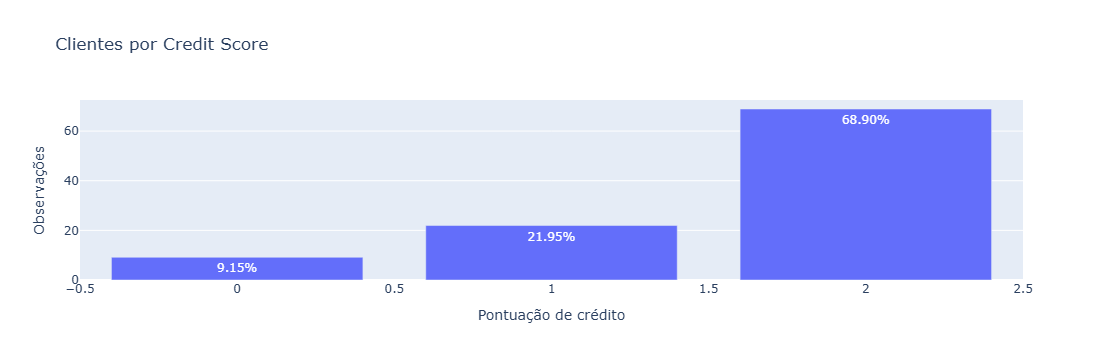

In [3702]:
# Dividindo os dados em categorias;
cscore_count = (maindf["Credit Score_Encoded"].value_counts(normalize=True)*100).reset_index()
cscore_count.columns = ["Credit_Score", "Credit_Score%"]

# Exibindo as informações em um gráfico;
fig = px.bar(cscore_count, x=cscore_count["Credit_Score"], y=cscore_count["Credit_Score%"], title="Clientes por Credit Score")
fig.update_traces(text=[f"{val:.2f}%" for val in cscore_count["Credit_Score%"]], textposition="inside")
fig.update_layout(xaxis_title="Pontuação de crédito")
fig.update_layout(yaxis_title="Observações")
fig.show()

Observando o balanciamento da variável podemos notar que claramente os dados estão extremamente desbalanciados, sendo assim, será necessário realizar o balanciamento para prosseguirmos com o projeto.

In [3721]:
# Balanceando a variável Credit Score;
smote =  SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento da variável;
y_train_balanced.value_counts()

Credit Score_Encoded
1    84
0    84
2    84
Name: count, dtype: int64

### Exportando os dados

In [3727]:
X_train_balanced.to_csv("X_train_balanced")
y_train_balanced.to_csv("y_train_balanced")
X_test.to_csv("X_test")
y_test.to_csv("y_test")